# PROJECT_1 (PLAYSTORE ANALYSIS)

# Objective
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.
The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations

### DATA

In [1]:
#df.head()

# Steps of Analysis 
### * Importing Data and libraries
### * Data Cleaning
  ### * Missing value Treatment
  ### * Correcting Data types
### * Identify and handle Outliers
### * Answering Business questions

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [3]:
os.getcwd()

'C:\\Users\\Raju'

In [4]:
df = pd.read_csv("Playstore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Task:1 Data clean up – Missing value treatment

#### a. Drop records where rating is missing since rating is our target/study variable

In [10]:
df.dropna(how="any",subset = ['Rating'],axis = 0,inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
df.Rating.isnull().sum()

0

In [12]:
df.shape

(9367, 13)

#### b. Check the null values for the Android Ver column. 

In [13]:
df['Android Ver'].isnull().sum()

3

In [14]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### i. Are all 3 records having the same problem?

#### Yes all 3 records having the same problem

#### ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [15]:
df.drop([10472], inplace = True)

In [16]:
df.shape

(9366, 13)

In [17]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### iii. Replace remaining missing values with the mode

In [18]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace = True)

In [19]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### c. Current ver – replace with most common value

In [20]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace = True)

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
df.shape

(9366, 13)

# Task: 2. Data clean up – correcting the data types

#### a. Which all variables need to be brought to numeric types?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


#### Reviews , installs and Price are need to be brought to numeric types.

#### b. Price variable – remove $ sign and convert to float

In [24]:
df['Price'] = df['Price'].apply((lambda x:str(x).replace('$', '') if '$' in str(x) else str(x)))

In [25]:
df['Price']= df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


#### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [26]:
df['Installs'] = df['Installs'].apply((lambda x:str(x).replace('+', '') if '+' in str(x) else str(x)))
df['Installs'] = df['Installs'].apply((lambda x:str(x).replace(',', '') if ',' in str(x) else str(x)))
df['Installs']= df['Installs'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


#### d. Convert all other identified columns to numeric

In [27]:
df['Reviews']= df['Reviews'].astype('float')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   float64
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# Task 3. Sanity checks – check for the following and handle accordingly

#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i. Are there any such records? Drop if so.

In [28]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5.

#### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [29]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Yes, there are 7 records where Review is greater than Installs.

In [30]:
df.drop(labels=df[df['Reviews'] > df['Installs']].index, inplace=True)

In [31]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
df.shape

(9359, 13)

#  Task 4. Identify and handle outliers – 

#### a. Price column

#### i. Make suitable plot to identify outliers in price

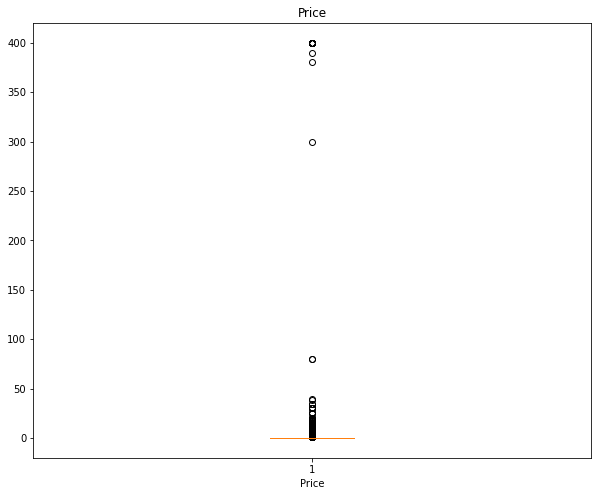

In [33]:
plt.figure(figsize=(10,8))
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.title('Price')
plt.show()

#### ii.Do you expect apps on the play store to cost $200? Check out these cases

In [34]:
print('Yes we can expect apps on the play store to cost $200') 
df.loc[df['Price'] >= 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### iv. Limit data to records with price < $30

In [35]:
df.drop(labels=df[df['Price'] >= 30].index, inplace=True) #Dropping using label index

In [36]:
count = df.loc[df['Price'] >= 30]
count.value_counts().sum()

0

In [37]:
df.shape

(9338, 13)

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

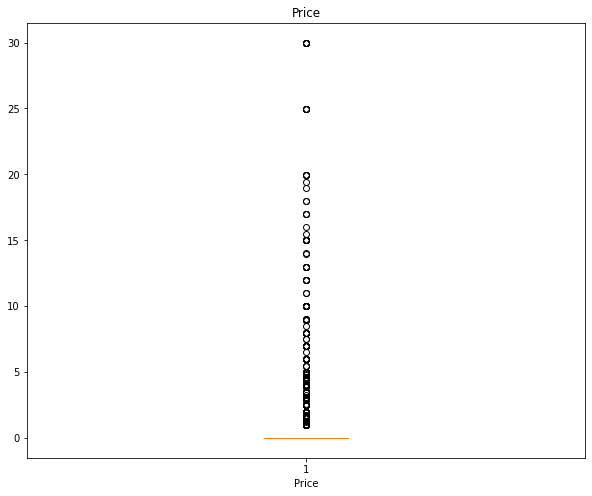

In [38]:
plt.figure(figsize=(10,8))
plt.boxplot(df['Price'])
plt.xlabel('Price')
plt.title('Price')
plt.show()

#### b. Reviews column

#### i. Make suitable plot

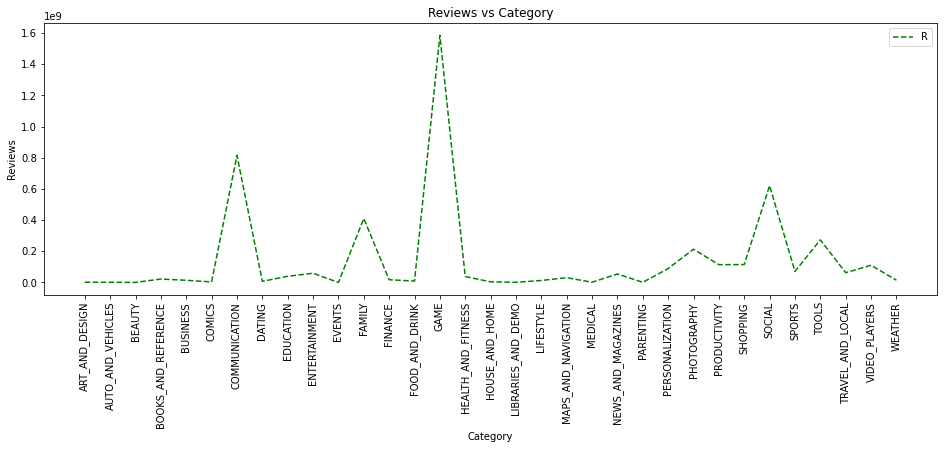

In [39]:
df1 = df.groupby(['Category']).sum()['Reviews']
plt.figure(figsize = (16,5))
plt.plot(df1 , 'r--', color ='g')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Reviews vs Category')
plt.legend('Reviwes')
plt.show()

#### ii. Limit data to apps with < 1 Million reviews

In [40]:
df1 = df.loc[df['Reviews'] >= 1000000]
df1['Reviews'].count()

704

In [41]:
df.drop(labels=df[df['Reviews'] >= 1000000].index, inplace=True)

In [42]:
count = df.loc[df['Reviews'] >= 1000000]
count.value_counts().sum()

0

In [43]:
df.shape

(8634, 13)

#### c. Installs

#### i. What is the 95th percentile of the installs?

In [44]:
percentile = df.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


#### ii.Drop records having a value more than the 95th percentile

In [45]:
df1 = df.loc[df['Installs'] > percentile] 
df1['Installs'].count()

199

In [46]:
 df.drop(labels = df[df["Installs"] > percentile].index, inplace = True) #Dropping using label index

In [47]:
df.shape

(8435, 13)

# Data analysis to answer business questions

## Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### a. How do you explain this? b. What is the implication of this on your analysis?

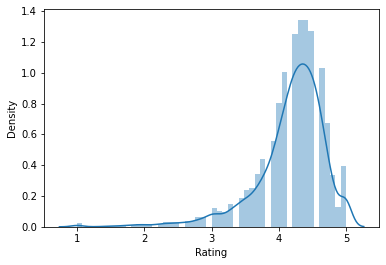

In [48]:
import seaborn as sns
sns.distplot(df['Rating'])
plt.show()


In [49]:
print("The mode of the distribution is:",df['Rating'].mode())
print("The median of the distribution is:",df['Rating'].median())
print("The mean of the distribution is:",df['Rating'].mean())

The mode of the distribution is: 0    4.3
dtype: float64
The median of the distribution is: 4.3
The mean of the distribution is: 4.170800237107298


A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.The mean is also on the left of the peak and in negative skew distribution mean is less than median and median is less than mode .From the above graph we can conclude that the ratings of the distribution are more skewed towards lower values
Since mode > medain > mean the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?

#### a. Are there any values with very few records?

In [50]:
d = df['Content Rating'].unique()
t = df['Content Rating'].value_counts()

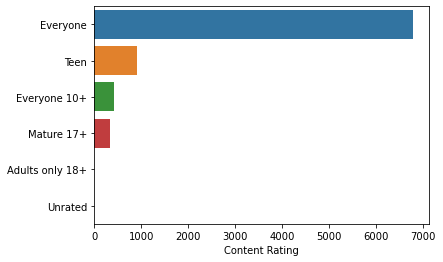

In [70]:
sns.barplot(y=d,x=t,data=df)
plt.show()

In [52]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### Adults only 18+ and Unrated are values with very few records so we drop them.

#### b. If yes, drop those as they won’t help in the analysis

In [53]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

In [54]:
df.shape

(8431, 13)

# Task 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating                  

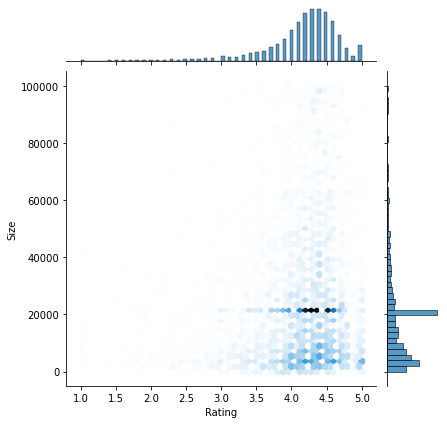

In [55]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind='hex')
plt.show()

In [56]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


In [57]:
df['Size'].corr(df['Rating'])

0.05807619836573066

#### b. Do you see any patterns? c. How do you explain the pattern?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.From the graph we can interpretate that the maximum rating is in between 4 to 4.5 and size in between 0 to 40000mb ,So we can infer that most of the apps which are in this size range got maximum ratings But this cannot be always true.For constant size applications also have Ratings.Hence there is weakly Positve correlation between Size and Ratings.The Correlation between Size an Rating is 5%. 

# Task 8. Effect of price on rating

#### a. Make a jointplot (with regression line)

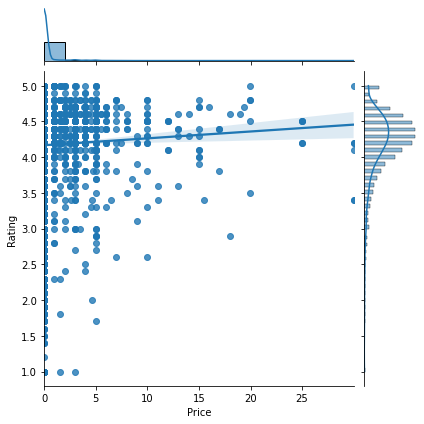

In [58]:
sns.jointplot(x ='Price', y ='Rating', data = df, kind='reg')
plt.show()

#### b. What pattern do you see? c. How do you explain the pattern?

The Price range between 0 to 5 have maximum ratings.Generally on increasing the Price, Rating remains almost constant greater than 4. 

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.The Correlation between Price and Rating is 0.0314.


In [59]:
df['Price'].corr(df['Rating'])

0.031479379360358495

#### d. Replot the data, this time with only records with price > 0 

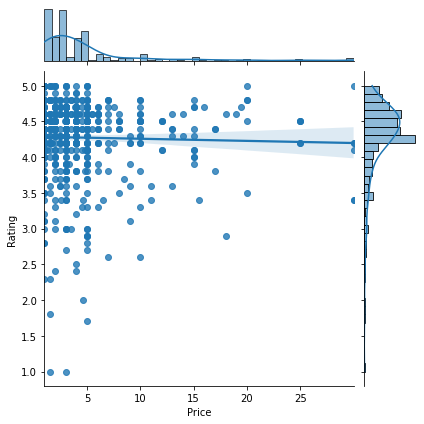

In [60]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

#### e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating i.e -0.0259.

In [61]:
df1['Price'].corr(df['Rating'])

-0.02597494573704414

#### f. What is your overall inference on the effect of price on the rating

Previously the correlation between price and rating was 0.031 And after applying condition the correlation changes to negative value -0.025975.Hence we can conclude that there is weakly correlation between Price and Rating.On increasing Price there is no effect on Ratings it is almost constant i.e Greater than 4

# 9. Look at all the numeric interactions together – 

#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

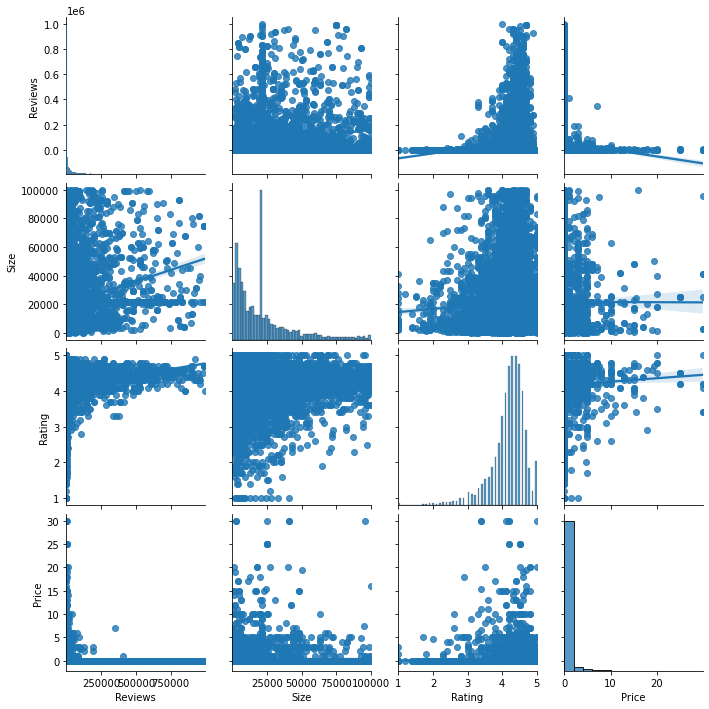

In [62]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

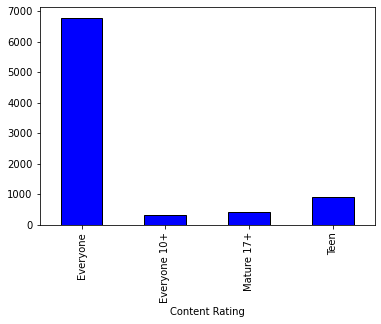

In [63]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="blue",edgecolor='black')
plt.show()

#### b. Which metric would you use? Mean? Median? Some other quantile?

From graph we can see that the content rating for everyone category is more compared to other categories Hence it acts as outlier,So we must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.The median is usually preferred in these situations because the value of the mean can be distorted by the outliers.

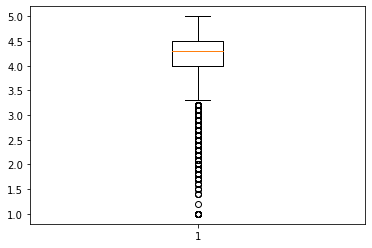

In [64]:
plt.boxplot(df['Rating'])
plt.show()

#### c. Choose the right metric and plot

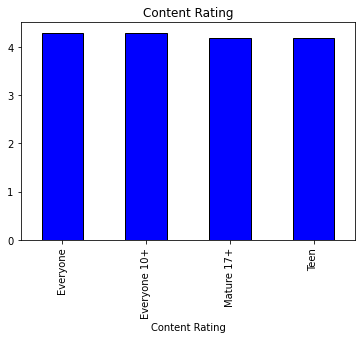

In [65]:
df2 = df.groupby(['Content Rating'])['Rating'].median()
df2.plot.bar(color="blue",edgecolor='black')
plt.title('Content Rating')
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

In [66]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [67]:
_20th_percentile = pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
_20th_percentile

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


#### c. Make a heatmap of this

#### i. Annotated

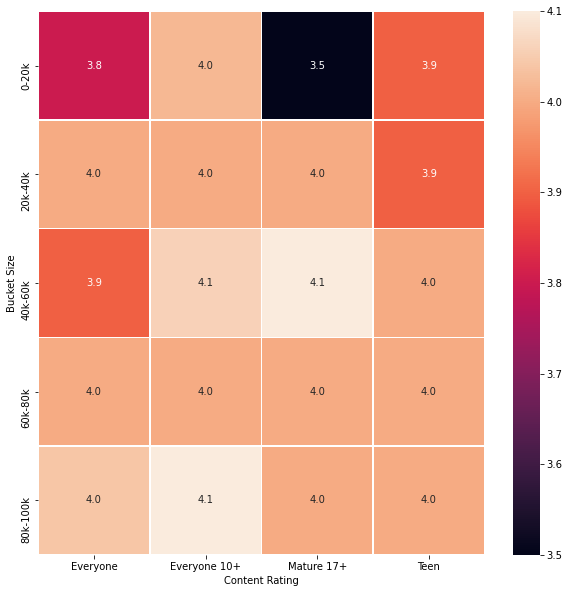

In [68]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(_20th_percentile, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

#### ii.Greens color map

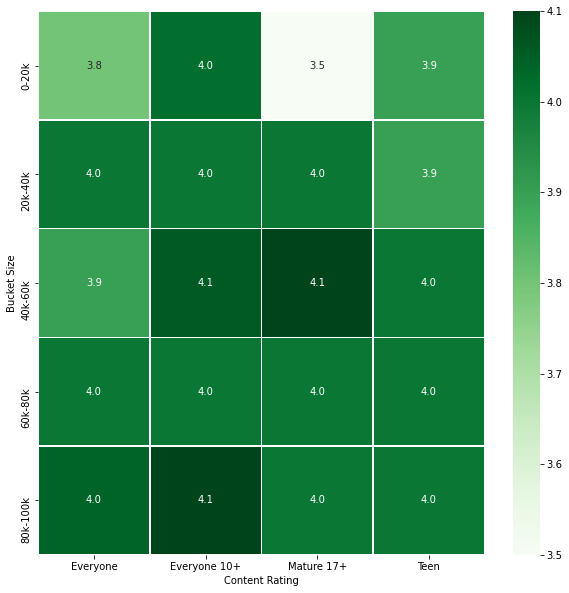

In [69]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(_20th_percentile, annot=True, linewidths=.5,cmap = "Greens", fmt='.1f',ax=ax)
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.